In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
plt.style.use('informes.mplstyle')

In [94]:
df = pd.read_csv(r'Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')

t = df['Time'].values
h = df['Position'].values
I = df['I'].values
P = df['P'].values
D = df['D'].values

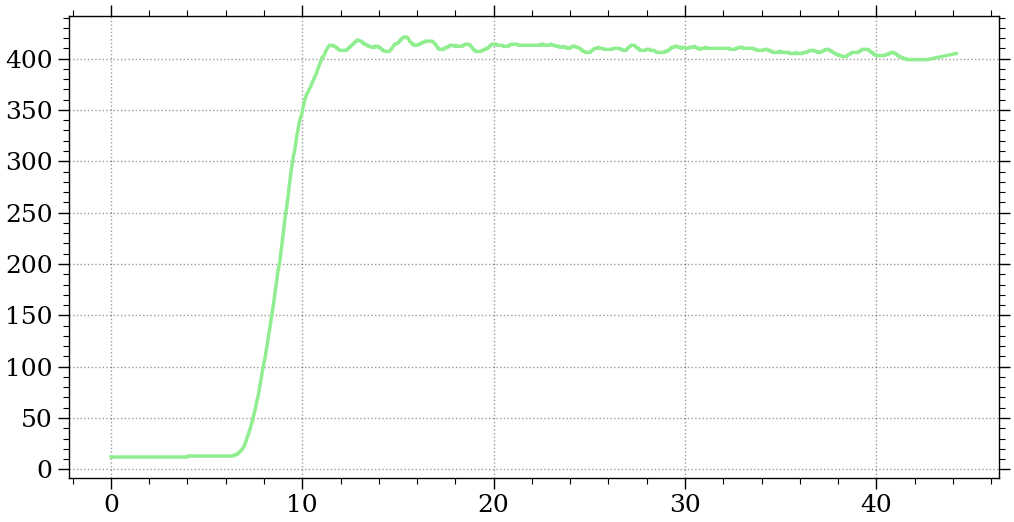

In [4]:
fig, ax = plt.subplots()

ax.plot(t,h)

FILTRO IIR (Infinite Impulse Response)

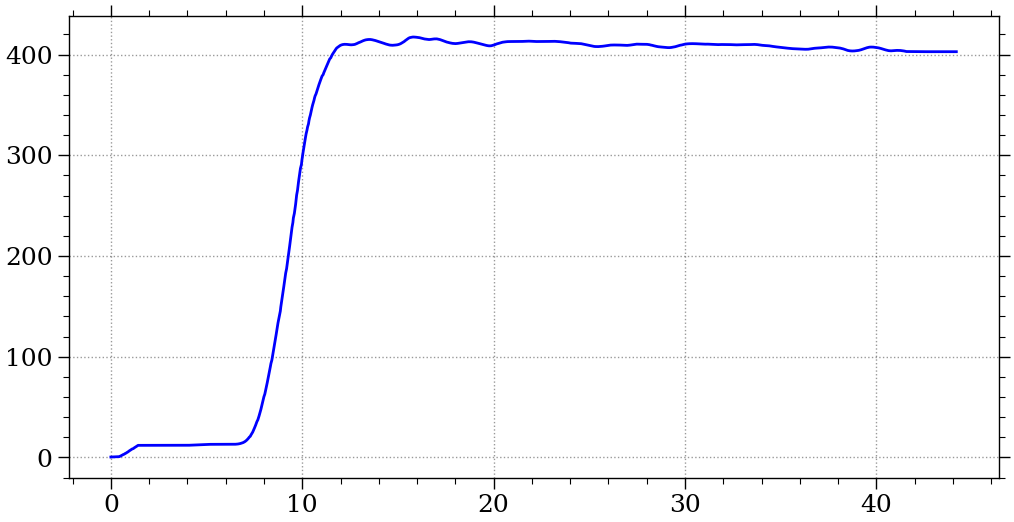

In [5]:
from scipy.signal import lfilter 

n = 30
b = [1.0 / n] * n
a = 1
hh = lfilter(b, a, h)
plt.plot(t, hh, linewidth=2, linestyle="-", c="b")  # smooth by filter

FILTRO PASA ALTOS

In [70]:
from scipy.signal import butter,filtfilt
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype = "high", analog = False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

27


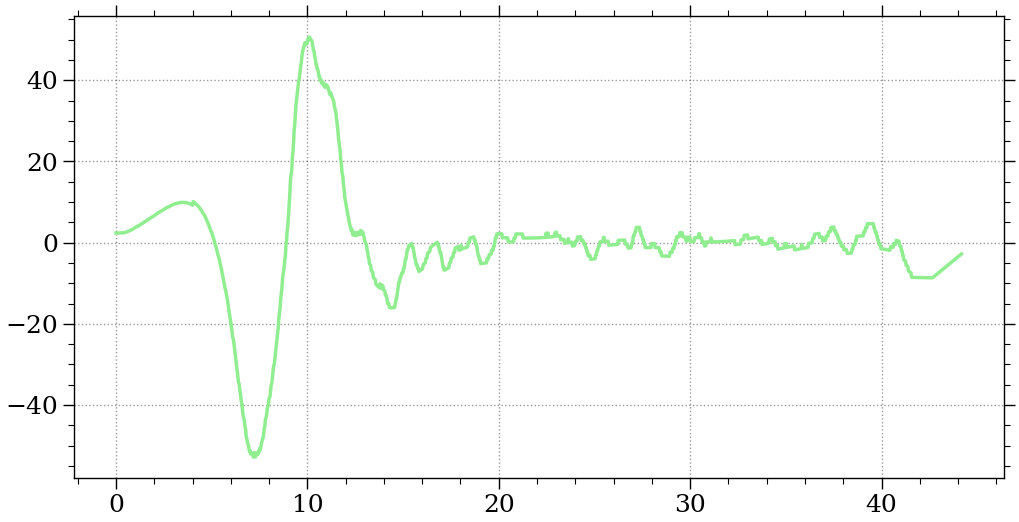

In [100]:
fs = int(len(t)/t[-1])
print(fs)
highpass_h = butter_highpass_filter(h,0.1,fs,2)
fig, ax = plt.subplots()
ax.plot(t,highpass_h)

Text(0.5, 1.0, 'Posición - posición filtrada (no pasa altos)')

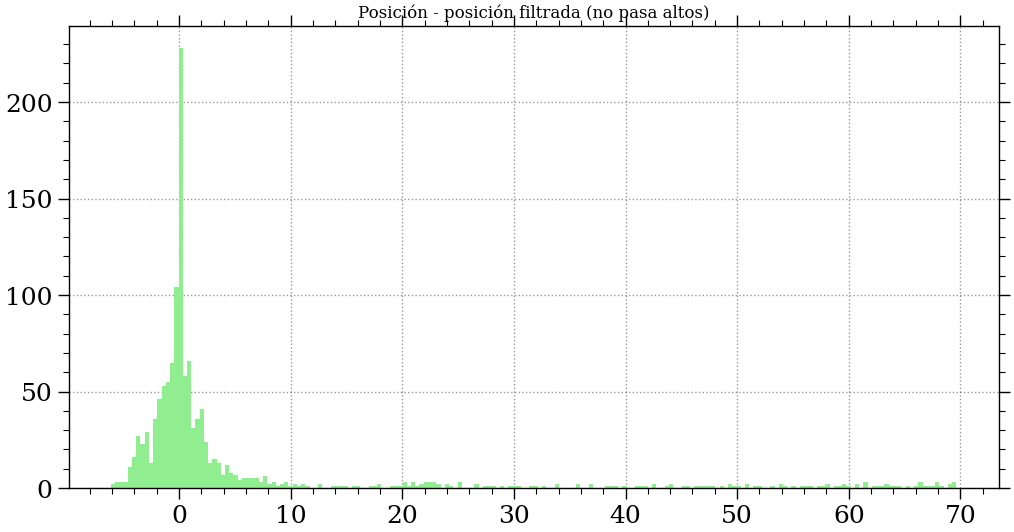

In [98]:
fig, ax = plt.subplots()
noise = h-hh
ax.hist(noise,bins=200)
plt.title(f'Posición - posición filtrada (no pasa altos)')

Text(0.5, 1.0, 'h filtrado pasa alto')

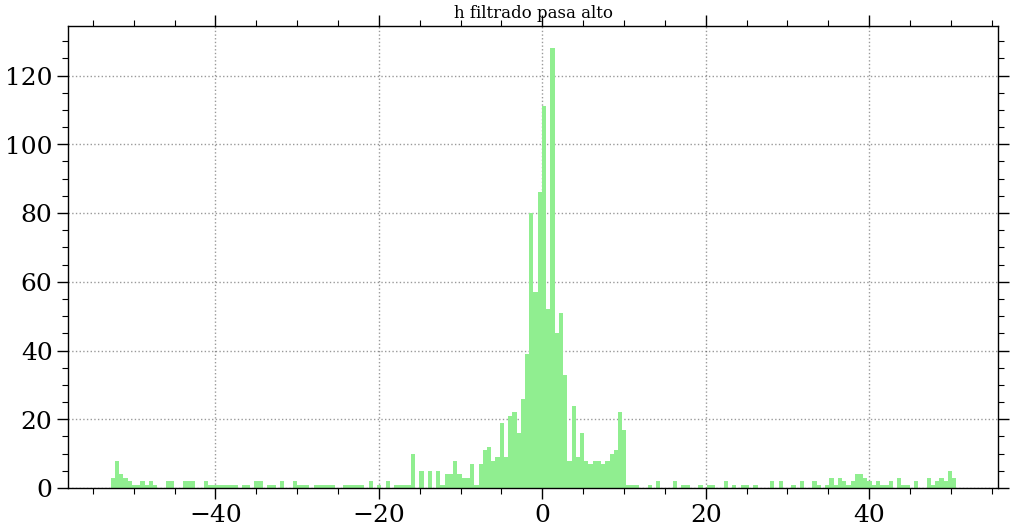

In [101]:
fig, ax = plt.subplots()
noise = highpass_h
ax.hist(noise,bins=200)
plt.title(f'h filtrado pasa alto')

Text(0, 0.5, 'FFT Amplitude |X(freq)|')

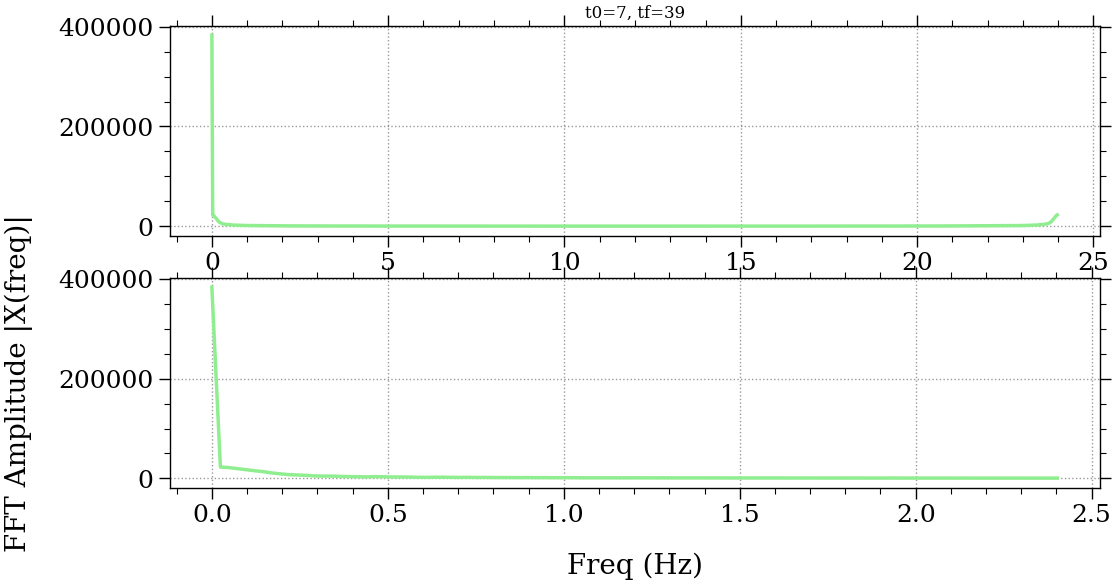

In [112]:
from scipy.fft import fft, ifft, fftfreq

fig, ax = plt.subplots(2,1)

hf = fft(h)
sampling_interval = t[-1]/len(t)
sr = int(1/sampling_interval)
N = len(hf)
n = np.arange(N)
T = N/sr
freq = n/T
ax[0].set_title(f't0={int(t[0])}, tf={int(t[-1])}')
ax[0].plot(freq,np.abs(hf))
ax[1].plot(freq[:100],np.abs(hf[:100]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# frequencies = fftfreq(len(h),samplerate)[0:N//2]

# hf_plot = 2/N*np.abs(hf)[:N//2]
# test = hf_plot[:100]
# plt.plot(frequencies,hf_plot)
# plt.xlim(0.1,.4)
# plt.ylim(0,40)

Text(0, 0.5, 'FFT Amplitude |X(freq)|')

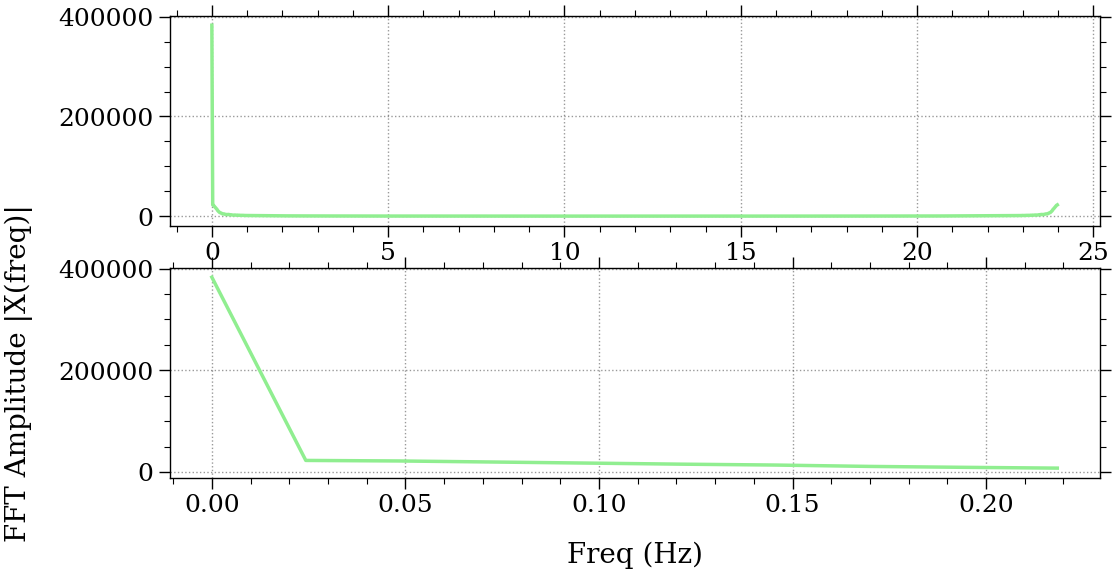

In [106]:
df = pd.read_csv(r'Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[(df['Time'] > 7) & (df['Time'] < 40)]
t = df['Time'].values
h = df['Position'].values
I = df['I'].values
P = df['P'].values
D = df['D'].values

from scipy.fft import fft, ifft, fftfreq

fig, ax = plt.subplots(2,1)

hf = fft(h)
sampling_interval = t[-1]/len(t)
sr = int(1/sampling_interval)
N = len(hf)
n = np.arange(N)
T = N/sr
freq = n/T
ax[0].plot(freq,np.abs(hf))
ax[1].plot(freq[:10],np.abs(hf[:10]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')


24


Text(0.5, 1.0, 'Posición filtrada pasa altos')

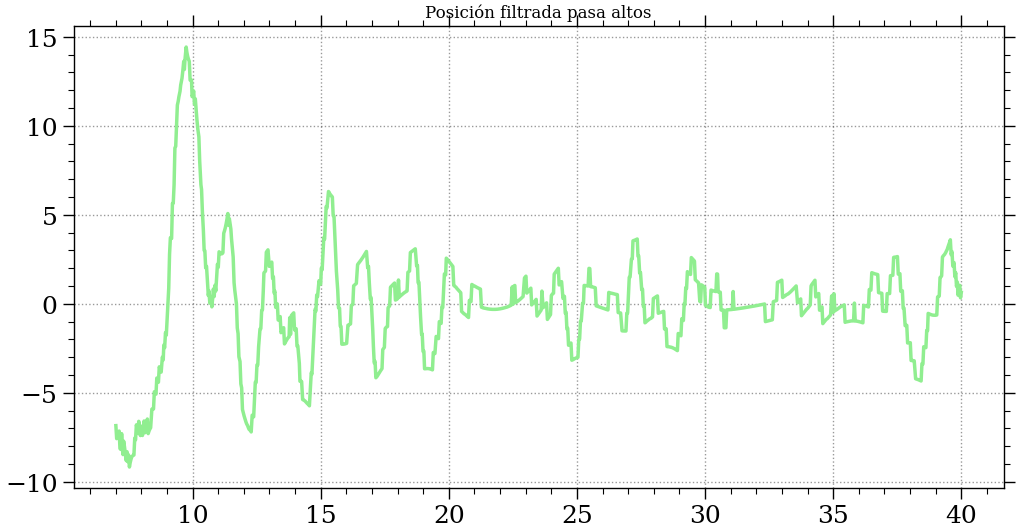

In [159]:
fs = int(len(t)/t[-1])
print(fs)
highpass_h = butter_highpass_filter(h,0.2,fs,2)
fig, ax = plt.subplots()
ax.plot(t,highpass_h)
ax.set_title(f'Posición filtrada pasa altos')

mu = -0.06724513407503392
sigma = 3.346716379203885


Text(0.5, 1.0, 'h filtrado pasa alto mu = 0,sigma = 3')

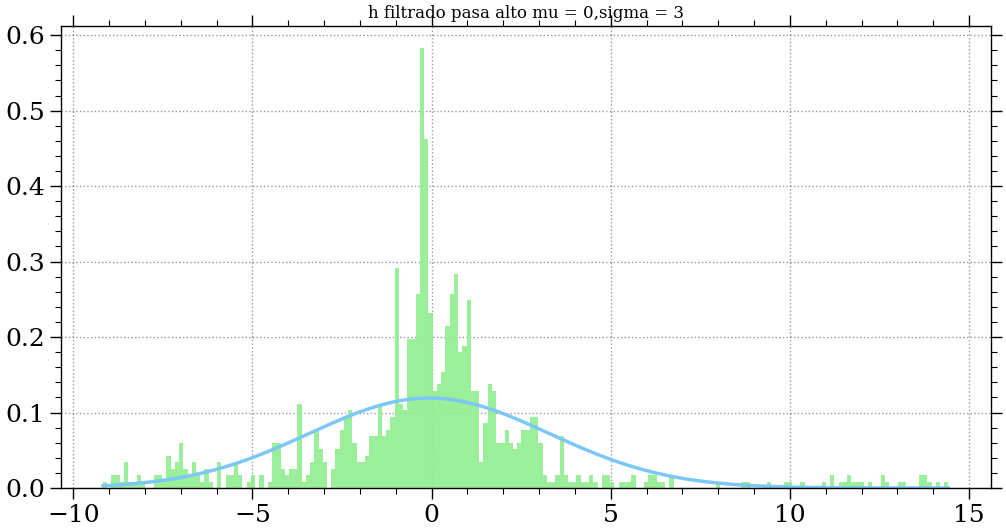

In [166]:
import statistics
from scipy.stats import norm

fig, ax = plt.subplots()
noise = highpass_h
mu, sigma = norm.fit(noise)
noise = np.array([element for element in noise if (element > -15 and element < 15)])

_, bins, _ = plt.hist(noise, 200, density=True, alpha=0.9)
# ax.hist(noise,bins=200)
# xmin,xmax = min(noise),max(noise)
xmin,xmax = -15,15

best_fit_line = norm.pdf(bins, mu, sigma)
print(f'mu = {mu}')
print(f'sigma = {sigma}')
x = np.linspace(xmin,xmax,len(noise))
p = norm.pdf(x, mu, sigma)

ax.plot(bins, best_fit_line)

plt.title(f'h filtrado pasa alto mu = {int(mu)},sigma = {int(sigma)}')
# ax.plot(x,p)


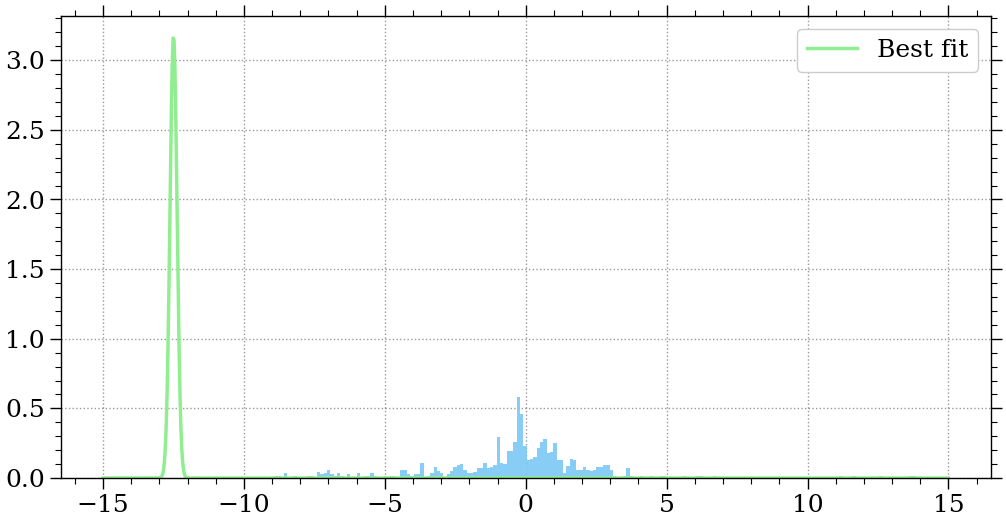

In [173]:
from scipy.stats import norm
from scipy.optimize import curve_fit
fig, ax = plt.subplots()

h = np.sort(noise)

def funcion(h, mu, sigma):
    return norm.pdf(h, loc=mu, scale=sigma)
                    
p0 = [0, np.sum(h**2)/len(noise)]
popt, pcov = curve_fit(funcion,x,noise,p0=[0,sigma])
ym = funcion(x, popt[0], popt[1])
ax.plot(x, ym,label='Best fit')
ax.hist(noise, 200, density=True, alpha=0.9)
ax.legend()


866
866
13
[-13.96649979  -7.91120573   0.42926049]


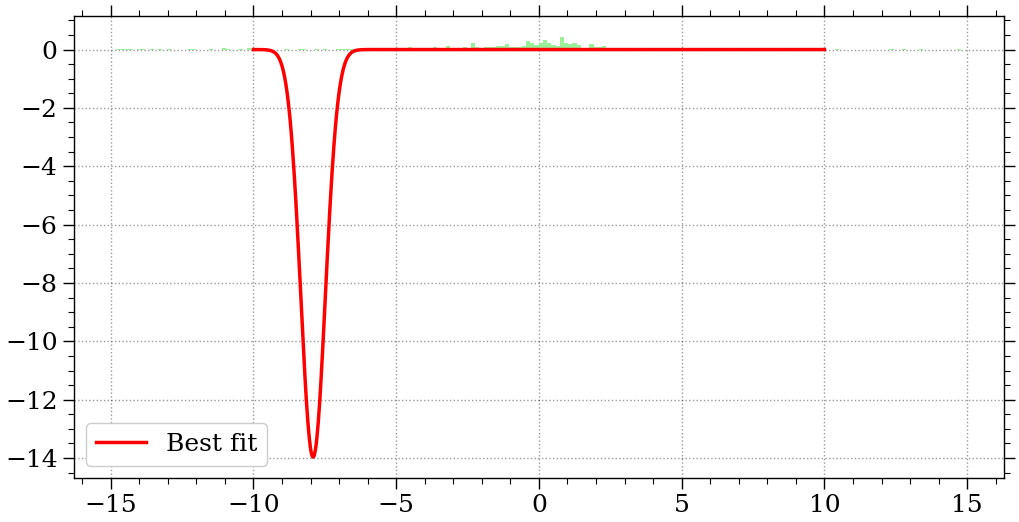

In [158]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as mpl
  
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
  
fig, ax = plt.subplots()
print(len(x))
print(len(noise))
sigma = np.sum(noise**2)/len(noise)
print(int(sigma))
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, noise,p0=[0,0,sigma])
  
#popt returns the best fit values for parameters of the given model (func)
print (popt)

_, bins, _ = plt.hist(noise, 200, density=True, alpha=0.9)
ym = func(x, popt[0], popt[1], popt[2])
ax.plot(x, ym, c='r', label='Best fit')
ax.legend()